In [1]:
import math
import numpy as np
import pandas as pd
import pandapower as pp
import geopandas as gpd
import matplotlib.pyplot as plt
from pandapower import plotting
from shapely.geometry import Point, LineString

In [2]:
#Location Points

# Mallorca
LOC_MA_1= (2.5088564,39.5377075)  
LOC_MA_2=(2.549367,39.584154)
LOC_MA_3=(2.678766,39.650978)
LOC_MA_4=(2.744258,39.600043)
LOC_MA_5=(2.7024111,39.5478121)
LOC_MA_6=(2.7256946,39.5682897)
LOC_MA_7=(3.039469,39.673588)
LOC_MA_8=(3.092512, 39.809610)
LOC_MA_9=(3.1586049,39.5817999)
LOC_MA_10=(3.4272896,39.7388162)

# Menorca
LOC_ME_1=(3.8337878,39.9319657)
LOC_ME_2=(3.8555081,40.0032335)
LOC_ME_3=(4.095810,39.977051)
LOC_ME_4=(4.237077,39.890989)
LOC_ME_5=(4.2579450,39.8971622)

# Ibiza
LOC_IB_1=(1.431238,38.919151)


#Length of lines
Length_MA_1_2=6.2
Length_MA_2_3_1=15.4 #up line
Length_MA_2_3_2=14.8 #down
Length_MA_3_4=9.0
Length_MA_4_5=7.4
Length_MA_4_6=4.0
Length_MA_3_7=33.7
Length_MA_4_7=28.8
Length_MA_7_8_1=16.6 #left
Length_MA_7_8_2=16.0 #right
Length_MA_7_9_1=15.0
Length_MA_7_9_2=15.4
Length_MA_9_10=30.3

Length_MA_10_ME_1=41.8

Length_ME_1_2=8.3
Length_ME_2_3=21.1
Length_ME_2_4=35.5
Length_ME_3_4=15.5
Length_ME_4_5_1=2.6 #up
Length_ME_4_5_2=2.0 #down

Length_MA_1_IB_1=126.0


#Set voltage variables
PF= 0.4843


In [3]:
#9:40PM 27/06/2020
net = pp.create_empty_network()

# Buses for Mallorca
Bus_MA_1_L = pp.create_bus(net, vn_kv=132, name = "MA_1_L", geodata=LOC_MA_1)
Bus_MA_1_H = pp.create_bus(net, vn_kv=220, name = "MA_1_H", geodata=LOC_MA_1)
Bus_MA_2=pp.create_bus(net, vn_kv=220, name = "MA_2", geodata=LOC_MA_2)
Bus_MA_3=pp.create_bus(net, vn_kv=220, name = "MA_3", geodata=LOC_MA_3)
Bus_MA_4=pp.create_bus(net, vn_kv=220, name = "MA_4", geodata=LOC_MA_4)
Bus_MA_5=pp.create_bus(net, vn_kv=220, name = "MA_5", geodata=LOC_MA_5)
Bus_MA_6=pp.create_bus(net, vn_kv=220, name = "MA_6", geodata=LOC_MA_6)
Bus_MA_7=pp.create_bus(net, vn_kv=220, name = "MA_7", geodata=LOC_MA_7)
Bus_MA_8=pp.create_bus(net, vn_kv=220, name = "MA_8", geodata=LOC_MA_8)
Bus_MA_9_L=pp.create_bus(net, vn_kv=132, name = "MA_9_L", geodata=LOC_MA_9) 
Bus_MA_9_H=pp.create_bus(net, vn_kv=220, name = "MA_9_H", geodata=LOC_MA_9) 
Bus_MA_10=pp.create_bus(net, vn_kv=132, name = "MA_10", geodata=LOC_MA_10)

# Buses for Menorca
Bus_ME_1=pp.create_bus(net, vn_kv=132, name = "ME_1", geodata=LOC_ME_1)
Bus_ME_2=pp.create_bus(net, vn_kv=132, name = "ME_2", geodata=LOC_ME_2)
Bus_ME_3=pp.create_bus(net, vn_kv=132, name = "ME_3", geodata=LOC_ME_3)
Bus_ME_4=pp.create_bus(net, vn_kv=132, name = "ME_4", geodata=LOC_ME_4)
Bus_ME_5=pp.create_bus(net, vn_kv=132, name = "ME_5", geodata=LOC_ME_5)

# Buses for Ibiza
Bus_IB_1=pp.create_bus(net, vn_kv=132, name = "IB_1", geodata=LOC_IB_1)

# Swing Bus
Swing_1 = pp.create_ext_grid(net, bus=Bus_MA_1_H, vm_pu=1.00, name="Swing Bus 1")


# Load

# Mallorca
Load_MA_1 = pp.create_load(net, bus=Bus_MA_1_L, p_mw=34, q_mvar=34*PF, name = "MA_1 Load")
Load_MA_1_R = pp.create_load(net, bus=Bus_MA_1_L, p_mw=0, q_mvar=200, name = "MA_1 Reactor")
Load_MA_2 = pp.create_load(net, bus=Bus_MA_2, p_mw=27, q_mvar=27*PF, name = "MA_2 Load")
Load_MA_3 = pp.create_load(net, bus=Bus_MA_3, p_mw=73.5, q_mvar=73.5*PF, name = "MA_3 Load")
Load_MA_4 = pp.create_load(net, bus=Bus_MA_4, p_mw=91, q_mvar=91*PF, name = "MA_4 Load")
Load_MA_5 = pp.create_load(net, bus=Bus_MA_5, p_mw=56.5, q_mvar=56.5*PF, name = "MA_5 Load")
Load_MA_6 = pp.create_load(net, bus=Bus_MA_6, p_mw=34, q_mvar=34*PF, name = "MA_6 Load")
Load_MA_7 = pp.create_load(net, bus=Bus_MA_7, p_mw=54, q_mvar=54*PF, name = "MA_7 Load")
Load_MA_8 = pp.create_load(net, bus=Bus_MA_8, p_mw=36, q_mvar=41*PF, name = "MA_8 Load")
Load_MA_9 = pp.create_load(net, bus=Bus_MA_9_L, p_mw=63, q_mvar=68*PF, name = "MA_9 Load")
Load_MA_10 = pp.create_load(net, bus=Bus_MA_10, p_mw=21, q_mvar=21*PF, name = "MA_10 Load")

# Menorca
Load_ME_1 = pp.create_load(net, bus=Bus_ME_1, p_mw=9, q_mvar=9*PF, name = "ME_1 Load")
Load_ME_2 = pp.create_load(net, bus=Bus_ME_2, p_mw=11, q_mvar=11*PF, name = "ME_2 Load")
Load_ME_3 = pp.create_load(net, bus=Bus_ME_3, p_mw=3, q_mvar=3*PF, name = "ME_3 Load")
Load_ME_4 = pp.create_load(net, bus=Bus_ME_4, p_mw=22, q_mvar=22*PF, name = "ME_4 Load")
Load_ME_5 = pp.create_load(net, bus=Bus_ME_5, p_mw=5, q_mvar=5*PF, name = "ME_5 Load")

# Ibiza
Load_IB_1 = pp.create_load(net, bus=Bus_IB_1, p_mw=101, q_mvar=101*PF, name = "IB_1 Load")

# Generator
Gen_MA_3 = pp.create_sgen(net, bus = Bus_MA_3, p_mw = 97, q_mvar = 97*PF, name = 'MA_3 Generation')
Gen_MA_5 = pp.create_sgen(net, bus = Bus_MA_5, p_mw = 61, q_mvar = 61*PF, name = 'MA_5 Generation')
Gen_MA_6 = pp.create_sgen(net, bus = Bus_MA_6, p_mw = 16, q_mvar = 16*PF, name = 'MA_6 Generation')
Gen_MA_4 = pp.create_sgen(net, bus = Bus_MA_4, p_mw = 13, q_mvar = 13*PF, name = 'MA_4 Generation')
Gen_MA_9 = pp.create_sgen(net, bus = Bus_MA_9_L, p_mw = 104, q_mvar = 104*PF, name = 'MA_9 Generation')

Gen_MA_8 = pp.create_sgen(net, bus = Bus_MA_8, p_mw = 96, q_mvar = 96*PF, name = 'MA_8 Generation')
Gen_MA_7 = pp.create_sgen(net, bus = Bus_MA_7, p_mw = 39, q_mvar = 39*PF, name = 'MA_7 Generation')


Gen_ME_2 = pp.create_sgen(net, bus = Bus_ME_2, p_mw = 92, q_mvar = 92*PF, name = 'ME_2 Generation')
Gen_IB_1 = pp.create_sgen(net, bus = Bus_IB_1, p_mw = 45, q_mvar = 45*PF, name = 'IB_1 Generation')

In [4]:
Trans_MA_1 = pp.create_transformer_from_parameters(net, hv_bus=Bus_MA_1_H, lv_bus=Bus_MA_1_L, sn_mva=400, vn_hv_kv=220, vn_lv_kv=132, vkr_percent=1, vk_percent=10, pfe_kw=4, i0_percent=1)

Trans_MA_9 = pp.create_transformer_from_parameters(net, hv_bus=Bus_MA_9_H, lv_bus=Bus_MA_9_L, sn_mva=400, vn_hv_kv=220, vn_lv_kv=132, vkr_percent=1, vk_percent=10, pfe_kw=4, i0_percent=1)


In [5]:
#132kv underwater line properties
R_LU = 0.06
X_LU = 0.144
C_LU = 144.0
A_LU = 0.588

#132 overhead line properties
R_LO = 0.1188
X_LO = 0.39
C_LO = 9.0
A_LO = 0.645

#220 overhead line properties
R_HO = 0.059
X_HO = 0.285
C_HO = 10
A_HO = 0.96

# Mallcora to Ibiza (Bus 1 - Bus 16)
Line1_MA_1_IB_1 = pp.create_line_from_parameters(net, from_bus = Bus_MA_1_L , to_bus = Bus_IB_1 , length_km=Length_MA_1_IB_1  , r_ohm_per_km=R_LU, x_ohm_per_km=X_LU, c_nf_per_km = C_LU, max_i_ka =A_LU, name = 'Line1_MA_1_IB_1', geodata = [LOC_IB_1, LOC_MA_1])
Line2_MA_1_IB_1 = pp.create_line_from_parameters(net, from_bus = Bus_MA_1_L, to_bus = Bus_IB_1, length_km=Length_MA_1_IB_1 ,  r_ohm_per_km=R_LU, x_ohm_per_km=X_LU, c_nf_per_km = C_LU, max_i_ka =A_LU , name = 'Line2_MA_1_IB_1', geodata = [LOC_IB_1, LOC_MA_1])

# Mallcora to Mencora (Bus 10 - Bus 11)
Line_MA_10_ME_1 = pp.create_line_from_parameters(net, from_bus = Bus_MA_10, to_bus = Bus_ME_1, length_km= Length_MA_10_ME_1,  r_ohm_per_km=R_LU, x_ohm_per_km=X_LU, c_nf_per_km = C_LU, max_i_ka = A_LU, name ='Line_MA_10_ME_1', geodata = [LOC_MA_10, LOC_ME_1]) 

# Inside Mencora
Line_ME_1_2=pp.create_line_from_parameters(net, from_bus = Bus_ME_1, to_bus = Bus_ME_2, length_km= Length_ME_1_2,  r_ohm_per_km=R_LO, x_ohm_per_km=X_LO, c_nf_per_km = C_LO, max_i_ka = A_LO, name ='Line_ME_1_2', geodata = [LOC_ME_1, LOC_ME_2]) 
Line_ME_2_3=pp.create_line_from_parameters(net, from_bus = Bus_ME_2, to_bus = Bus_ME_3, length_km= Length_ME_2_3,  r_ohm_per_km=R_LO, x_ohm_per_km=X_LO, c_nf_per_km = C_LO, max_i_ka = A_LO, name ='Line_ME_2_3', geodata = [LOC_ME_2, LOC_ME_3]) 
Line_ME_2_4=pp.create_line_from_parameters(net, from_bus = Bus_ME_2, to_bus = Bus_ME_4, length_km= Length_ME_2_4,  r_ohm_per_km=R_LO, x_ohm_per_km=X_LO, c_nf_per_km = C_LO, max_i_ka = A_LO, name ='Line_ME_2_4', geodata = [LOC_ME_2, LOC_ME_4]) 
Line_ME_3_4=pp.create_line_from_parameters(net, from_bus = Bus_ME_3, to_bus = Bus_ME_4, length_km= Length_ME_3_4,  r_ohm_per_km=R_LO, x_ohm_per_km=X_LO, c_nf_per_km = C_LO, max_i_ka = A_LO, name ='Line_ME_3_4', geodata = [LOC_ME_3, LOC_ME_4]) 
Line_ME_4_5_1=pp.create_line_from_parameters(net, from_bus = Bus_ME_4, to_bus = Bus_ME_5, length_km= Length_ME_4_5_1,  r_ohm_per_km=R_LO, x_ohm_per_km=X_LO, c_nf_per_km = C_LO, max_i_ka = A_LO, name ='Line_ME_4_5_1', geodata = [LOC_ME_4, LOC_ME_5]) 
Line_ME_4_5_2=pp.create_line_from_parameters(net, from_bus = Bus_ME_4, to_bus = Bus_ME_5, length_km= Length_ME_4_5_2,  r_ohm_per_km=R_LO, x_ohm_per_km=X_LO, c_nf_per_km = C_LO, max_i_ka = A_LO, name ='Line_ME_4_5_2', geodata = [LOC_ME_4, LOC_ME_5]) 


# Inside Mallcora

# Bus 1 H - Bus 2
Line_MA_1_2=pp.create_line_from_parameters(net, from_bus = Bus_MA_1_H, to_bus = Bus_MA_2, length_km= Length_MA_1_2,  r_ohm_per_km=R_HO, x_ohm_per_km=X_HO, c_nf_per_km = C_HO, max_i_ka = A_HO, name ='Line_MA_1_2', geodata = [LOC_MA_1, LOC_MA_2]) 

# Bus 2 - Bus 3
Line_MA_2_3_1=pp.create_line_from_parameters(net, from_bus = Bus_MA_2, to_bus = Bus_MA_3, length_km= Length_MA_2_3_1,  r_ohm_per_km=R_HO, x_ohm_per_km=X_HO, c_nf_per_km = C_HO, max_i_ka = A_HO, name ='Line_MA_2_3_1', geodata = [LOC_MA_2, LOC_MA_3]) 
Line_MA_2_3_2=pp.create_line_from_parameters(net, from_bus = Bus_MA_2, to_bus = Bus_MA_3, length_km= Length_MA_2_3_2,  r_ohm_per_km=R_HO, x_ohm_per_km=X_HO, c_nf_per_km = C_HO, max_i_ka = A_HO, name ='Line_MA_2_3_2', geodata = [LOC_MA_2, LOC_MA_3]) 

# Bus 3 - Bus 4
Line_MA_3_4=pp.create_line_from_parameters(net, from_bus = Bus_MA_3, to_bus = Bus_MA_4, length_km= Length_MA_3_4,  r_ohm_per_km=R_HO, x_ohm_per_km=X_HO, c_nf_per_km = C_HO, max_i_ka = A_HO, name ='Line_MA_3_4', geodata = [LOC_MA_3, LOC_MA_4]) 

# Bus 5 - Bus 4
Line_MA_5_4=pp.create_line_from_parameters(net, from_bus = Bus_MA_5, to_bus = Bus_MA_4, length_km= Length_MA_4_5,  r_ohm_per_km=R_HO, x_ohm_per_km=X_HO, c_nf_per_km = C_HO, max_i_ka = A_HO, name ='Line_MA_5_4', geodata = [LOC_MA_5, LOC_MA_4]) 

# Bus 6 - Bus 4
Line_MA_6_4=pp.create_line_from_parameters(net, from_bus = Bus_MA_6, to_bus = Bus_MA_4, length_km= Length_MA_4_6,  r_ohm_per_km=R_HO, x_ohm_per_km=X_HO, c_nf_per_km = C_HO, max_i_ka = A_HO, name ='Line_MA_6_4', geodata = [LOC_MA_6, LOC_MA_4]) 

# Bus 3 - Bus 7
Line_MA_3_7=pp.create_line_from_parameters(net, from_bus = Bus_MA_3, to_bus = Bus_MA_7, length_km= Length_MA_3_7,  r_ohm_per_km=R_HO, x_ohm_per_km=X_HO, c_nf_per_km = C_HO, max_i_ka = A_HO, name ='Line_MA_3_7', geodata = [LOC_MA_3, LOC_MA_7]) 

# Bus 4 - Bus 7
Line_MA_4_7=pp.create_line_from_parameters(net, from_bus = Bus_MA_4, to_bus = Bus_MA_7, length_km= Length_MA_4_7,  r_ohm_per_km=R_HO, x_ohm_per_km=X_HO, c_nf_per_km = C_HO, max_i_ka = A_HO, name ='Line_MA_4_7', geodata = [LOC_MA_4, LOC_MA_7]) 

# Bus 7 - Bus 8
Line_MA_7_8_1=pp.create_line_from_parameters(net, from_bus = Bus_MA_7, to_bus = Bus_MA_8, length_km= Length_MA_7_8_1,  r_ohm_per_km=R_HO, x_ohm_per_km=X_HO, c_nf_per_km = C_HO, max_i_ka = A_HO, name ='Line_MA_7_8_1', geodata = [LOC_MA_7, LOC_MA_8]) 
Line_MA_7_8_2=pp.create_line_from_parameters(net, from_bus = Bus_MA_7, to_bus = Bus_MA_8, length_km= Length_MA_7_8_2,  r_ohm_per_km=R_HO, x_ohm_per_km=X_HO, c_nf_per_km = C_HO, max_i_ka = A_HO, name ='Line_MA_7_8_2', geodata = [LOC_MA_7, LOC_MA_8]) 

# Bus 7 - Bus 9 H
Line_MA_7_9_1=pp.create_line_from_parameters(net, from_bus = Bus_MA_7, to_bus = Bus_MA_9_H, length_km= Length_MA_7_9_1,  r_ohm_per_km=R_HO, x_ohm_per_km=X_HO, c_nf_per_km = C_HO, max_i_ka = A_HO, name ='Line_MA_7_9_1', geodata = [LOC_MA_7, LOC_MA_9]) 
Line_MA_7_9_2=pp.create_line_from_parameters(net, from_bus = Bus_MA_7, to_bus = Bus_MA_9_H, length_km= Length_MA_7_9_2,  r_ohm_per_km=R_HO, x_ohm_per_km=X_HO, c_nf_per_km = C_HO, max_i_ka = A_HO, name ='Line_MA_7_9_2', geodata = [LOC_MA_7, LOC_MA_9]) 

# Bus 9 L - Bus 10
Line_MA_9_10=pp.create_line_from_parameters(net, from_bus = Bus_MA_9_L, to_bus = Bus_MA_10, length_km= Length_MA_9_10,  r_ohm_per_km=R_LO, x_ohm_per_km=X_LO, c_nf_per_km = C_LO, max_i_ka = A_LO, name ='Line_MA_9_10', geodata = [LOC_MA_9, LOC_MA_10]) 


In [6]:
pp.runpp(net)

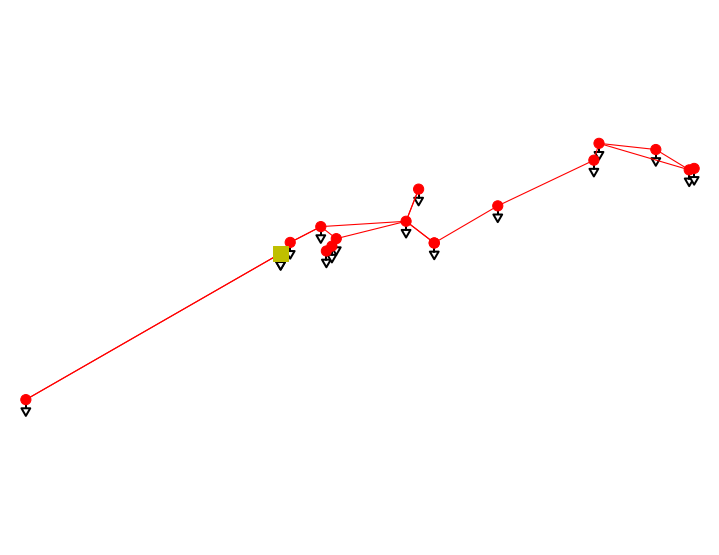

In [7]:
pp.to_excel(net, 'Solar_2140.xlsx')
pp.plotting.simple_plot(net, line_width=1.1, bus_size=1.1, ext_grid_size=1.1, trafo_size=1.2, plot_loads=True, plot_sgens=False, load_size=1.1, sgen_size=3.0, switch_size=1.1, switch_distance=1.1, plot_line_switches=False, scale_size=True, bus_color='r', line_color='red', trafo_color='k', ext_grid_color='y', switch_color='k', library='igraph', show_plot=True)


In [8]:
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,28.917837,-82.918316,-28.000000,-13.560400,0.917837,-96.478716,0.390288,0.134824,0.390288,0.984137,-1.253862,1.009279,-3.863324,66.375439
1,28.917837,-82.918316,-28.000000,-13.560400,0.917837,-96.478716,0.390288,0.134824,0.390288,0.984137,-1.253862,1.009279,-3.863324,66.375439
2,-41.295644,-62.222779,41.740597,24.535055,0.444953,-37.687724,0.303909,0.193535,0.303909,1.074786,1.423350,1.094225,1.815474,51.685264
3,-50.740597,-28.893755,50.901077,28.927622,0.160480,0.033868,0.233400,0.232429,0.233400,1.094225,1.815474,1.101736,2.186434,36.186111
4,15.467050,5.356944,-15.434447,-6.506452,0.032603,-1.149508,0.064982,0.066773,0.066773,1.101736,2.186434,1.097165,1.881021,10.352462
5,14.631873,4.943733,-14.581990,-6.888433,0.049883,-1.944700,0.061314,0.064464,0.064464,1.101736,2.186434,1.094229,1.702946,9.994361
6,12.434447,5.053552,-12.418204,-5.916987,0.016242,-0.863435,0.053508,0.054985,0.054985,1.097165,1.881021,1.094229,1.702946,8.524793
7,2.173998,0.917443,-2.173913,-1.070519,0.000085,-0.153076,0.009432,0.009687,0.009687,1.094229,1.702946,1.094141,1.697735,1.501834
8,2.826197,1.233377,-2.826087,-1.350981,0.000110,-0.117604,0.012326,0.012522,0.012522,1.094229,1.702946,1.094141,1.697735,1.941374
9,-9.933694,-61.999606,9.963052,61.196498,0.029358,-0.803107,0.164782,0.162337,0.164782,1.000000,0.000000,1.002321,-0.005851,17.164788
